In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import *
from scipy import optimize
import time

Bestimmung der Normierungskonstante $N$:

\begin{align}
    f(x) =& N \frac{x^3}{e^x-1} \\
    1 =& \int_0 f(x) \text{d}x\\
    1 =& N \int_0 \frac{x^3}{e^x-1}\text{d}x\\
    1 =& N \cdot \frac{\pi^4}{15} \\
    N =& \frac{15}{\pi^4} \\
    f(x) =& \frac{15}{\pi^4} \frac{x^3}{e^x-1}
\end{align}

In [2]:
def f(x):
    return (15*x**3)/((np.pi)**4*(np.exp(x)-1))

Bestimmung der Extrema:

\begin{align}
    f'(x) &= 0 \\
    f'(x) &= \frac{15}{\pi^4}\frac{(e^x(x-3)+3)\cdot x^2}{(e^x-1)^2} = 0
\end{align}

Das ist nicht analytisch lösbar, also mit scipy.optimize.brentq Nullstelle suchen. 

In [3]:
def f_abl(x):
    return (15*(np.exp(x)*(x-3)+3)*x**2)/(np.pi**4*(np.exp(x)-1)**2)

In [4]:
a=optimize.brentq(f_abl,-1,1)
b=optimize.brentq(f_abl,2,3)
print('Extrema 1: ',a)
print('Extrema 2: ',b)

Extrema 1:  -0.0002502474468460993
Extrema 2:  2.8214393721220787


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


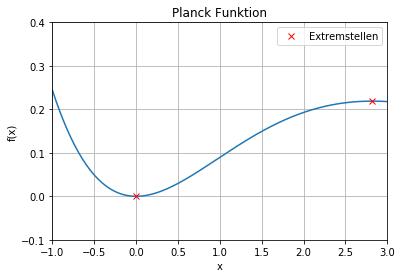

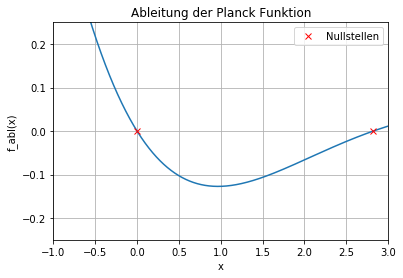

In [5]:
x = np.linspace(-5,5,10000)

plt.plot(x,f(x))
plt.grid()
plt.title('Planck Funktion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(a,f(a),'rx',label='Extremstellen')
plt.legend()
plt.plot(b,f(b),'rx')
plt.ylim(-0.1,0.4)
plt.xlim(-1,3)
plt.show()

plt.plot(x,f_abl(x))
plt.plot(a,f_abl(a),'rx',label='Nullstellen')
plt.plot(b,f_abl(b),'rx')
plt.title('Ableitung der Planck Funktion')
plt.xlabel('x')
plt.ylabel('f_abl(x)')
plt.ylim(-0.25,0.25)
plt.xlim(-1,3)
plt.grid()
plt.legend()
plt.show()

$\Rightarrow$ Bei $x = 2.82144$ ist ein Maximum und bei $x = -0.00025$ ein Minimum

In [6]:
y_max = f(b)
x_cut = 20
print('Maximum f(x_max) =',y_max)

Maximum f(x_max) = 0.218886470091


In [7]:
rnd_planck = []
i_verworfen = 0
start = time.time()
for k in range(10**5):
    v = np.random.uniform(0,x_cut)
    u = np.random.uniform(0,y_max)
    while(u>f(v)):
        v = np.random.uniform(0,x_cut)
        u = np.random.uniform(0,y_max)
        i_verworfen += 1 #Wenn man in der Schleife ist wurde die erste Zahl verworfen und für
        #jeden weiteren Durchlauf wird eine weitere verworfen
    rnd_planck.append(v)
end = time.time()

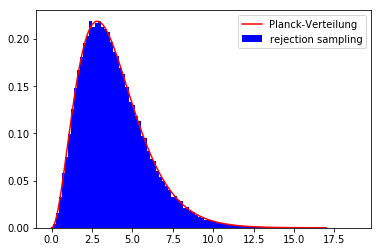

In [8]:
y = np.linspace(10**-5,17,100000)

plt.hist(rnd_planck,color='b',bins=100,normed=True,label='rejection sampling')
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.legend()
plt.show()

# b)

Durch das zerlegen in Majoranten ist es nun möglich die beiden stetigen Funktionen zu invertieren.
Somit können nun mit importance sampling Zufallszahlen für diese Verteilung gezogen werden.

$g_1(x) = y_{max}$ für $x < x_s$

$g_2(x) = 200  N\cdot x^{-0.1}\cdot e^{-x^{0.9}}$ für $x > x_s$

$G_1(x) = \int_0^{x} g_1(x) \text{d}x = y_{max} \cdot x$

$G_2(x) = \int_{x_s}^{x} g_2(x) \text{d}x + \int_0^{x_s} g_1(x) \text{d}x =  y_{max} \cdot x_s + \frac{2000 N}{9}(e^{-x_s^{0.9}}-e^{-x^{0.9}})$

$G_1^{-1}(u) = \frac{1}{y_{max}} u$

$G_2^{-1}(u) = x_s - \text{ln}(-\frac{9}{2000N}y_{max}x_s-u)^{\frac{10}{9}}$

In [9]:
def g_schnitt(x):
    return ((200*(15/(np.pi**4))*x**(-0.1)*np.exp(-x**(0.9)))-0.218886470091)

In [10]:
x_s = optimize.brentq(g_schnitt,5,6) #Schnittpunkt der beiden Majoranten
print('Schnittpunkt von g1 und g2:',x_s)
print('Schnittpunkt der Inversen:',y_max*x_s)

limG2 = y_max*x_s+(2000*15/(9*np.pi**4))*np.exp(-x_s**(9/10))

Schnittpunkt von g1 und g2: 5.678208598338173
Schnittpunkt der Inversen: 1.24288303653


In [11]:
def g(x,x_s,y_max):
    if x <= x_s:
        return y_max
    else:
        return (200*15/np.pi**4)*x**(-0.1)*np.exp(-x**0.9)

In [12]:
def G1(x,y_max):
    return y_max * x

In [13]:
def G2(x,x_s,y_max):
    return y_max*x_s+(2000*15/(9*np.pi**4))*(np.exp(-x_s**(9/10))-np.exp(-x**(9/10)))

In [14]:
def G1_inv(x,y_max):
    return 1/y_max * x

In [15]:
def G2_inv(x,x_s,y_max):
    return (-np.log((y_max*x_s-x)/(2000/9*15/np.pi**4)+np.exp(-x_s**(9/10))))**(10/9)

In [16]:
def InverseG(x,x_s,y_max):
    if x <= y_max*x_s:
        return 1/y_max * x
    else:
        return (-np.log((y_max*x_s-x)/(2000/9*15/np.pi**4)+np.exp(-x_s**(9/10))))**(10/9)

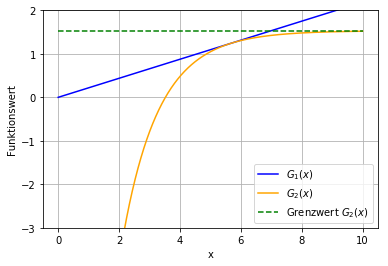

Grenzwert für G2: 1.53221575162


In [17]:
z = np.linspace(0,10,10**5)
plt.plot(z,G1(z,y_max),'blue',label=r'$G_1(x)$')
plt.plot(z,G2(z,x_s,y_max),'orange',label=r'$G_2(x)$')
plt.plot([0,10],[limG2,limG2],'g--',label='Grenzwert 'r'$G_2(x)$')
plt.legend()
plt.ylim(-3,2)
plt.xlabel('x')
plt.ylabel('Funktionswert')
plt.grid()
plt.show()

print('Grenzwert für G2:',limG2) #Dieser wird benötigt um festzulegen 
                                #in welchem Bereich die Zufallszahlen gezogen werden

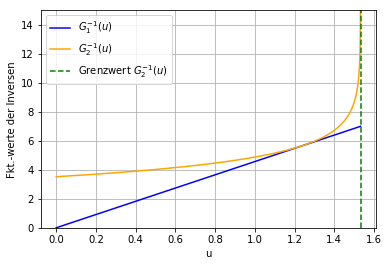

In [18]:
z2 = np.linspace(0,limG2,10**5)
plt.plot(z2,G1_inv(z2,y_max),'blue',label=r'$G_1^{-1}(u)$')
plt.plot(z2,G2_inv(z2,x_s,y_max),'orange',label=r'$G_2^{-1}(u)$')
plt.plot([limG2,limG2],[0,15],'g--',label='Grenzwert 'r'$G_2^{-1}(u)$')
plt.legend()
plt.ylim(0,15)
plt.xlabel('u')
plt.ylabel('Fkt.-werte der Inversen')
plt.grid()
plt.show()

In [19]:
inv_list = []
i_imp = 0
i = 0
start_b = time.time()
while i in range(10**5):
    u = np.random.uniform(0,limG2)
    v = np.random.uniform(0,limG2)
    u2 = InverseG(u,x_s,y_max) #transformieren der Zufallszahl
    if g(u2,x_s,y_max)*v <= f(u2): #Akzeptanz-Kriterium für importance sampling
        inv_list.append(InverseG(u,x_s,y_max))
        i += 1
    else:
        i_imp += 1
end_b = time.time()

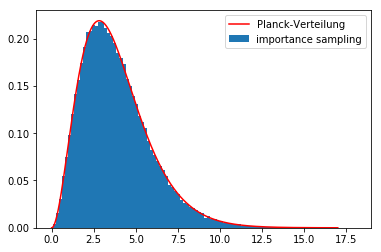

In [20]:
plt.hist(inv_list,bins=100,normed=True,label='importance sampling')
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.legend()
plt.show()

# c)

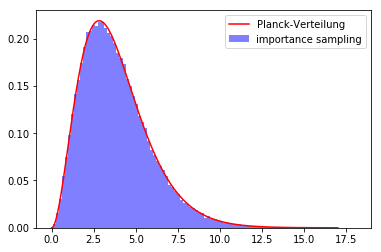

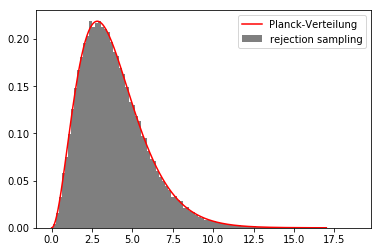

In [21]:
plt.hist(inv_list,color='b',bins=100,normed=True,label='importance sampling', alpha=0.5)
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.legend()
plt.show()

plt.hist(rnd_planck,color='k',bins=100,normed=True,label='rejection sampling', alpha=0.5)
plt.plot(y,f(y),'r',label='Planck-Verteilung')
plt.legend()
plt.show()

In [22]:
print('Verworfene Zahlen aus a):',i_verworfen)
print('Zeit für a):', end-start, 's')
print('Verworfene Zahlen aus b):',i_imp)
print('Zeit für a):', end_b-start_b, 's')

Verworfene Zahlen aus a): 337046
Zeit für a): 15.81653618812561 s
Verworfene Zahlen aus b): 134972
Zeit für a): 17.10958242416382 s


Das generieren der Zufallszahlen mit dem importance sampling zeigt zeitlich kaum unterschiede.
Viel interessanter und wichtiger ist, dass es nur ca. $\frac{1}{3}$ der Werte vom rejection sampling verworfen hat dabei.